In [35]:
from pathlib import Path
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

import utils

In [36]:
plt.style.use(['science', 'grid'])
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 14})
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.4)

## Load results data from competition

In [37]:
DATA_DIR = Path("../data/")
TEAMS = [
    "Kleopatra",
    "Team_SB",
    "OptiML",
    "HustSmart",
    "OrbertoHood",
    "UPB",
    "MTGBWS",
    "HowToRoute",
    "Kirchhoffslaw"
]

## Combine results and compute gap

In [38]:
df = pd.read_csv(DATA_DIR / "euro-neurips.csv", index_col="instance")

best = df.min(axis=1).values
gaps = df.subtract(best, axis=0).divide(best, axis=0) * 100
means = gaps.mean().sort_values()

means

hindsight                   0.000000
Kleopatra                   6.131170
icd-double-threshold600     6.458654
icd-double-threshold180     6.745216
icd-double-threshold        6.915437
icd-hamming-distance3       7.680876
icd-hamming-distance2       7.846524
Team_SB                     8.985564
OptiML                      9.440477
icd-hamming-distance1       9.682117
HustSmart                  10.198198
OrbertoHood                10.348533
UPB                        11.709379
MTGBWS                     12.431149
HowToRoute                 12.663953
Kirchhoffslaw              12.752803
dtype: float64

## Plot

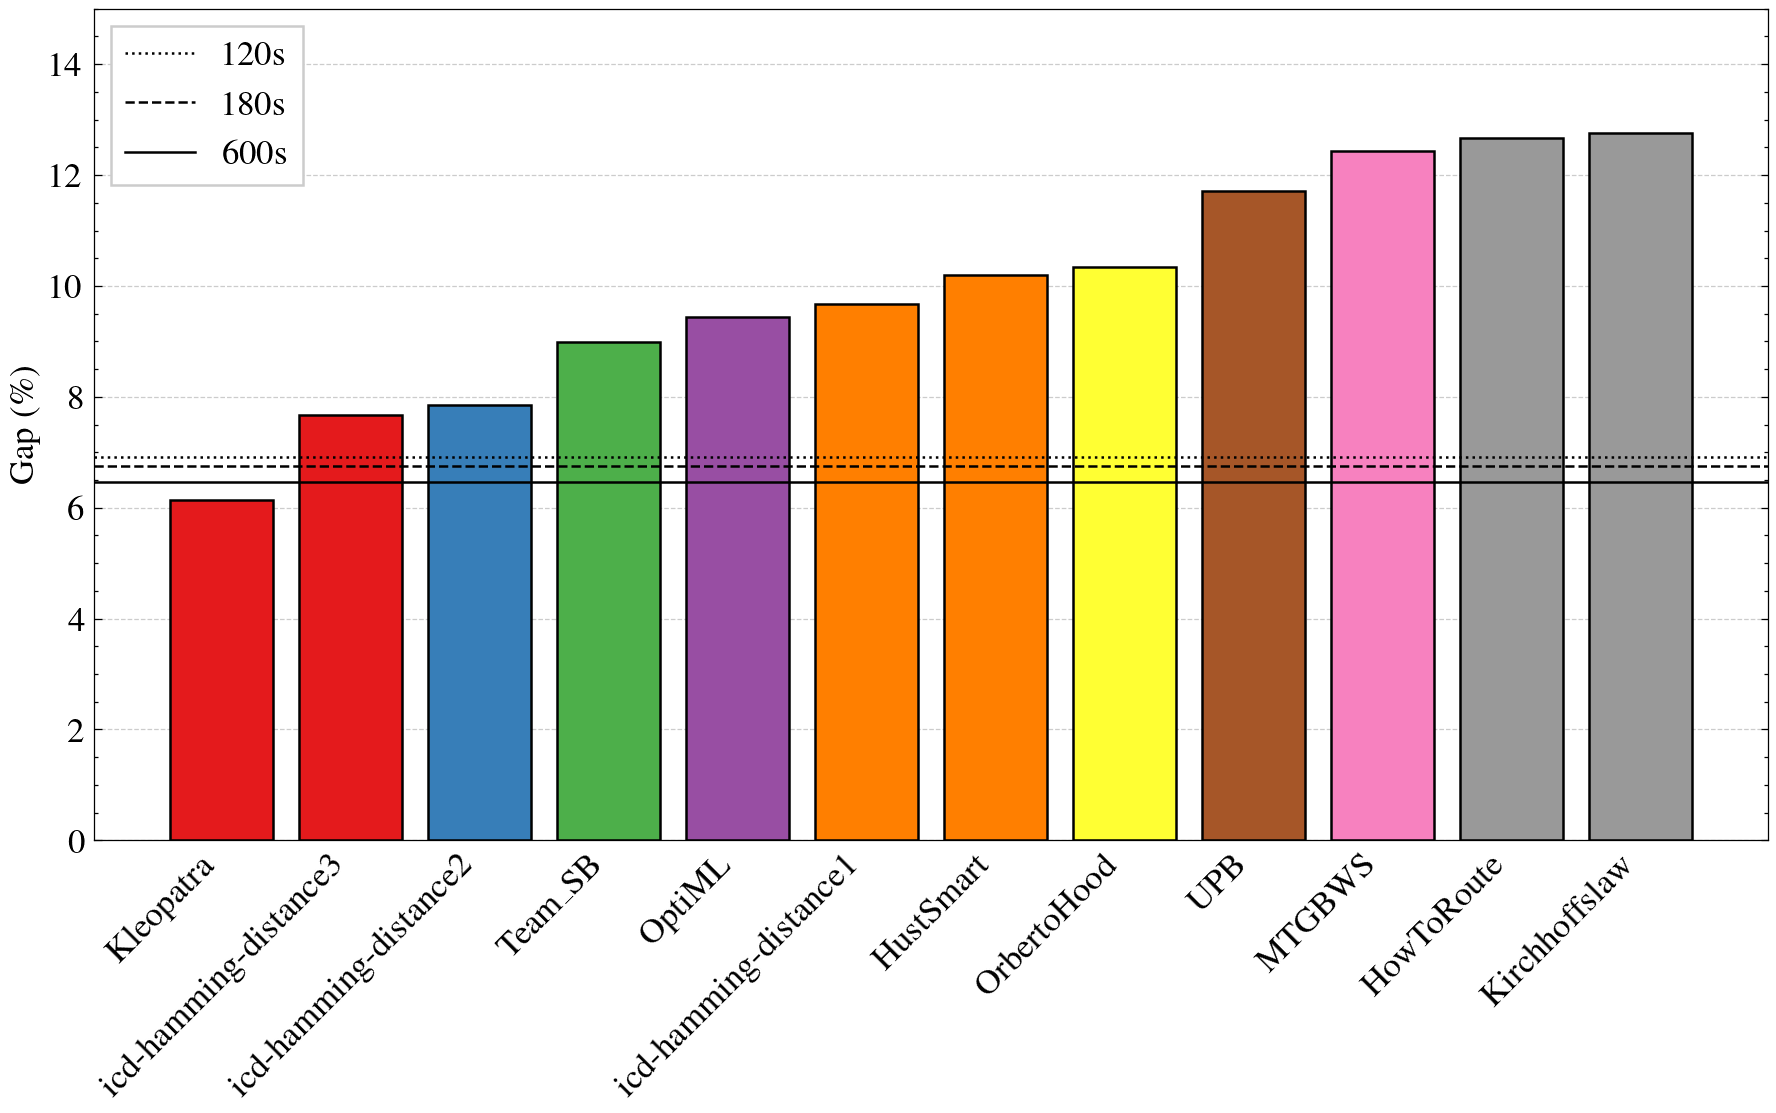

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=180)

# Plot team results as bars
bars = means.drop(['hindsight', 'icd-double-threshold', 'icd-double-threshold180', 'icd-double-threshold600'])
cmap = plt.get_cmap('Set1')
colors = [cmap(i) for i in np.linspace(0, 1, len(bars))]
ax.bar(bars.index, bars.values, color=colors, linewidth=1, edgecolor='black')

# Plot ICD as lines
icd = means[['icd-double-threshold', 'icd-double-threshold180', 'icd-double-threshold600']]
linestyles = [':', '--', '-']
labels = ["120s", "180s", "600s"]

for idx, val in enumerate(icd):
    plt.axhline(y=val,linewidth=1, color='k', linestyle=linestyles[idx], label=labels[idx])

ax.set_ylim(0, 15)
plt.ylabel('Gap (\%)')

plt.grid(axis='x') # Show horizontal grid lines only
plt.xticks(rotation=45, ha='right');
ax.xaxis.set_ticks_position('none') # remove xtickmarks


plt.legend(fancybox=False)
plt.savefig("../figures/euro-neurips.pdf")